# map(func)
It takes function as an argument and that function is applied to every element of RDD. 
It takes one element and produces one element.

In [3]:
val mapRdd = sc.parallelize(1 to 10)
mapRdd.map(x => x * 2).collect()

mapRdd = ParallelCollectionRDD[0] at parallelize at <console>:27


Array(2, 4, 6, 8, 10, 12, 14, 16, 18, 20)

# flatmap(func) 
Flatmap is also similar to map which takes function as an argument and applies each element to that function.
It takes one element and produces zero or more elements. (It's flattening the result of map function)

In [14]:
val linesRdd = sc.parallelize(Seq("First sentence","Second sentence with more words"))
val wordsRdd = linesRdd.flatMap( line => line.split(" "))
val resFlatMap = wordsRdd.collect()
val wordArr = wordsRdd.map( word => (word,1)).collect()

linesRdd = ParallelCollectionRDD[33] at parallelize at <console>:30
wordsRdd = MapPartitionsRDD[34] at flatMap at <console>:31
resFlatMap = Array(First, sentence, Second, sentence, with, more, words)
wordArr = Array((First,1), (sentence,1), (Second,1), (sentence,1), (with,1), (more,1), (words,1))


Array((First,1), (sentence,1), (Second,1), (sentence,1), (with,1), (more,1), (words,1))

# filter(func)
Returns a new RDD, containing only the elements that meet a predicate

In [16]:
val numbersRdd = sc.parallelize(1 to 10)
numbersRdd.filter( x=> x %2 ==0).collect() //Return only even numbers

numbersRdd = ParallelCollectionRDD[38] at parallelize at <console>:29


Array(2, 4, 6, 8, 10)

# mapPartitions(func)
In mapPartition it applies the map function on each partition. It's operates on partition rather than each element.

In [42]:
val data = sc.parallelize(List(1,2,3,4,5,6,7,8), 2)

def sumfuncpartition(numbers : Iterator[Int]) : Iterator[Int] = {
    var sum = 1
    while(numbers.hasNext)
    {
        sum = sum + numbers.next()
    }
    return Iterator(sum)
}
data.mapPartitions(sumfuncpartition).collect()

data = ParallelCollectionRDD[64] at parallelize at <console>:30


sumfuncpartition: (numbers: Iterator[Int])Iterator[Int]


Array(11, 27)

# mapPartitionsWithIndex (func)
mapPartitionsWithIndex is similar to mapPartitions() but it provides second parameter index which keeps the track of partition.

In [55]:
val data = sc.parallelize(List(1,2,3,4,5,6,7,8), 2)

def sumfuncpartitionWithIndex(index : Int, numbers : Iterator[Int]) : Iterator[Int] = {
    var sum = 1
    while(numbers.hasNext)
    {
        sum = sum + numbers.next()
    }
    println("Called in Partition -> " + index)
    Iterator(sum)
}

data.mapPartitionsWithIndex(sumfuncpartitionWithIndex).collect()

/*
data.mapPartitionsWithIndex((index,iterator) => {
    var sum = 1
    while(iterator.hasNext)
    {
        sum = sum + iterator.next()
    }
    Iterator(sum)
}).collect()
*/

data = ParallelCollectionRDD[80] at parallelize at <console>:30


sumfuncpartitionWithIndex: (index: Int, numbers: Iterator[Int])Iterator[Int]


Array(11, 27)

# union(dataset)
Union is used to combine both rdd togther. The key rule is both rdd should be same type

In [66]:
val rdd1 = sc.parallelize(Seq((1,"jan",2016),(3,"nov",2014),(16,"feb",2014),(1,"jan",2016)))
val rdd2 = sc.parallelize(Seq((5,"dec",2014),(17,"sep",2015)))
val rdd3 = sc.parallelize(Seq((6,"dec",2011),(16,"may",2015)))
val rddUnion = rdd1.union(rdd2).union(rdd3)
rddUnion.toDF("day","month","year").show()

+---+-----+----+
|day|month|year|
+---+-----+----+
|  1|  jan|2016|
|  3|  nov|2014|
| 16|  feb|2014|
|  1|  jan|2016|
|  5|  dec|2014|
| 17|  sep|2015|
|  6|  dec|2011|
| 16|  may|2015|
+---+-----+----+



rdd1 = ParallelCollectionRDD[120] at parallelize at <console>:32
rdd2 = ParallelCollectionRDD[121] at parallelize at <console>:33
rdd3 = ParallelCollectionRDD[122] at parallelize at <console>:34
rddUnion = UnionRDD[124] at union at <console>:35


UnionRDD[124] at union at <console>:35

# intersection(other-dataset)
With the intersection() function, we get only the common element of both the RDD in new RDD. The key rule of this function is that the two RDDs should be of the same type.

In [84]:
val rdd1 = sc.parallelize(Seq((1,"jan",2016),(3,"nov",2014), (16,"feb",2014)))
val rdd2 = sc.parallelize(Seq((5,"dec",2014),(1,"jan",2016)))
val common = rdd1.intersection(rdd2)
common.toDF("day","month","year").show()

+---+-----+----+
|day|month|year|
+---+-----+----+
|  1|  jan|2016|
+---+-----+----+



rdd1 = ParallelCollectionRDD[142] at parallelize at <console>:30
rdd2 = ParallelCollectionRDD[143] at parallelize at <console>:31
common = MapPartitionsRDD[149] at intersection at <console>:32


MapPartitionsRDD[149] at intersection at <console>:32

# distinct()
It returns a new dataset that contains the distinct elements of the source dataset. It is helpful to remove duplicate data.

In [14]:
val rdd1 = sc.parallelize(Seq((1,"jan",2016),(3,"nov",2014),(16,"feb",2014),(3,"nov",2014)))
val result = rdd1.distinct()
result.collect().mkString(", ")

rdd1 = ParallelCollectionRDD[17] at parallelize at <console>:30
result = MapPartitionsRDD[20] at distinct at <console>:31


(3,nov,2014), (16,feb,2014), (1,jan,2016)

# groupByKey
This tranformation applied on the dataset of (K, V) pairs. Combine all the records which belongs to same key across all the partition in the RDD. More data shuffling can happen which leads to out of memory or disk space error for huge dataset.

In [21]:
val data = sc.parallelize(Array(('k',5),('s',3),('s',4),('p',7),('p',5),('t',8),('k',6)),3)
val group = data.groupByKey().map(x => (x._1,x._2)).collect()
group.foreach(println)


(s,CompactBuffer(3, 4))
(p,CompactBuffer(7, 5))
(t,CompactBuffer(8))
(k,CompactBuffer(5, 6))


data = ParallelCollectionRDD[31] at parallelize at <console>:31
group = Array((s,CompactBuffer(3, 4)), (p,CompactBuffer(7, 5)), (t,CompactBuffer(8)), (k,CompactBuffer(5, 6)))


Array((s,CompactBuffer(3, 4)), (p,CompactBuffer(7, 5)), (t,CompactBuffer(8)), (k,CompactBuffer(5, 6)))

# reduceByKey 
This tranformation applied on the dataset of (K, V) pairs. Which does grouping and aggregation on the dataset (group().reduce()). This combines all the records which belongs to the same key within the partition and then combines the data across all the partitions.

In [18]:
val words = Array("one","two","two","four","five","six","six","eight","nine","ten")
val data = sc.parallelize(words).map(w => (w,1)).reduceByKey(_+_)
data.collect()

words = Array(one, two, two, four, five, six, six, eight, nine, ten)
data = ShuffledRDD[30] at reduceByKey at <console>:31


Array((nine,1), (six,2), (five,1), (two,2), (ten,1), (one,1), (four,1), (eight,1))

# aggregateByKey

  * The main objective of aggregateByKey transformation is transforming any PairRDD[(K,V)] to the RDD[(K,C)] where C is the result of any aggregation of all values under key K  
  * Spark aggregateByKey is similar to reduceByKey but the return RDD type is different for aggregateByKey
  * Following are the three parameters of aggregateByKey function,
        1. zeroValue: As we are finding maximum marks out of all subjects we should use Double.MinValue (which is also known as an accumulator)
        2. seqOp: Sequential operation is an operation of finding maximum marks (operation at each partition level data)
        3. combOp: Combiner operation is an operation of finding maximum marks from two values (operation on aggregated data of all partitions)
        
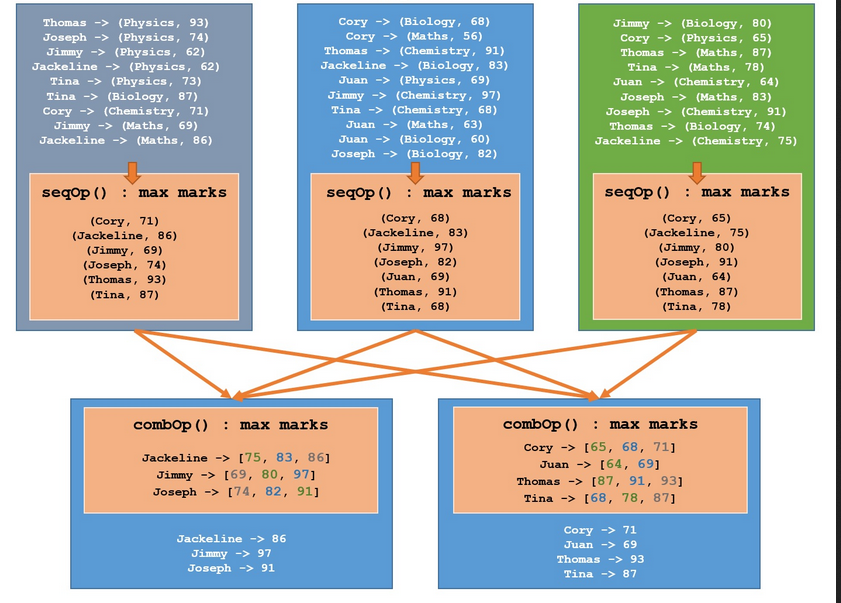

In [5]:
 val studentRDD = sc.parallelize(Array(
      ("Joseph", "Maths", 83), ("Joseph",  "Physics", 74), ("Joseph", "Chemistry", 91), ("Joseph", "Biology", 82),
      ("Jimmy", "Maths", 69), ("Jimmy", "Physics", 62), ("Jimmy", "Chemistry", 97), ("Jimmy", "Biology", 80),
      ("Tina", "Maths", 78), ("Tina", "Physics", 73), ("Tina", "Chemistry", 68), ("Tina", "Biology", 87),
      ("Thomas", "Maths", 87), ("Thomas", "Physics", 93), ("Thomas", "Chemistry", 91), ("Thomas", "Biology", 74),
      ("Cory", "Maths", 56), ("Cory", "Physics", 65), ("Cory", "Chemistry", 71), ("Cory", "Biology", 68),
      ("Jackeline", "Maths", 86), ("Jackeline", "Physics", 62), ("Jackeline", "Chemistry", 75), ("Jackeline", "Biology", 83),
      ("Juan", "Maths", 63), ("Juan", "Physics", 69), ("Juan", "Chemistry", 64), ("Juan", "Biology", 60)), 3)

 //Sequence operation : Finding Maximum Marks from a single partition
  val seqOp = (accu : Int, element : (String,Int)) => {
    if (element._2 > accu ) element._2 else accu
  }

  //Combiner Operation : Finding Maximum Marks out Partition-Wise Accumulators
  val combOp = (accu1 : Int, accu2 : Int) => {
    if (accu1 > accu2 ) accu1 else accu2
  }

val zeroValue = 0

println("Displaying student name and it's maximum mark")
studentRDD.map( x => (x._1, (x._2 , x._3)))
    .aggregateByKey(zeroValue)(seqOp,combOp)
    .collect().foreach(println)

println("\nDisplaying name along with subject and it's maximum mark")
/*Displaying name along with subject and it's maximum mark*/
  val zeroValue1 = ("",0)
  val seqOp1 = (accu : (String,Int), element : (String,Int)) => {
    if (element._2 > accu._2 ) element else accu
  }
  val combOp1 = (accu1 : (String,Int), accu2 : (String,Int)) => {
    if (accu1._2 > accu2._2 ) accu1 else accu2
  }

  studentRDD.map( x => (x._1, (x._2 , x._3)))
    .aggregateByKey(zeroValue1)(seqOp1,combOp1)
    .collect().foreach(println)

  /*Displaying name and percentage*/
println("\nDisplaying name and percentage")
  val zeroValue2 = (0,0)
  val seqOp2 = (accu : (Int,Int), element : (String,Int)) => {
    (accu._1 + element._2, accu._2 + 1)
  }
  val combOp2 = (accu1 : (Int,Int), accu2 : (Int,Int)) => {
    (accu1._1 + accu2._1, accu1._2 + accu2._2)
  }

  studentRDD.map( x => (x._1, (x._2 , x._3)))
    .aggregateByKey(zeroValue2)(seqOp2,combOp2)
    .collect().foreach(println)


Displaying student name and it's maximum mark
(Tina,87)
(Thomas,93)
(Jackeline,86)
(Joseph,91)
(Juan,69)
(Jimmy,97)
(Cory,71)

Displaying name along with subject and it's maximum mark
(Tina,(Biology,87))
(Thomas,(Physics,93))
(Jackeline,(Maths,86))
(Joseph,(Chemistry,91))
(Juan,(Physics,69))
(Jimmy,(Chemistry,97))
(Cory,(Chemistry,71))

Displaying name and percentage
(Tina,(306,4))
(Thomas,(345,4))
(Jackeline,(306,4))
(Joseph,(330,4))
(Juan,(256,4))
(Jimmy,(308,4))
(Cory,(260,4))


studentRDD = ParallelCollectionRDD[74] at parallelize at <console>:38
seqOp = > Int = <function2>
combOp = > Int = <function2>
zeroValue = 0
zeroValue1 = ("",0)
seqOp1 = > (String, Int) = <function2>
combOp1 = > (String, Int) = <function2>
zeroValue2 = (0,0)
seqOp2 = > (Int, Int) = <function2>
combOp2 = > (Int, Int) = <function2>


> (Int, Int) = <function2>

# combineByKey

 * Spark combineByKey is a transformation operation on PairRDD (i.e. RDD with key/value pair)
 * The main objective of combineByKey transformation is transforming any PairRDD[(K,V)] to the RDD[(K,C)] where C is the result of any aggregation of all values under key K.
 * Spark combineByKey function uses following three functions as an argument,
    1. createCombiner
         * This function is a first argument of combineByKey function
         * It is a first aggregation step for each key
         * It will be executed when any new key is found in a partition
         * Execution of this lambda function is local to a partition of a node, on each individual values
    2. mergeValue
         * Second function executes when next subsequent value is given to combiner
         * It also executes locally on each partition of a node and combines all values
         * Arguments of this function are a accumulator and a new value
         * It combines a new value in existing accumulator
    3. mergeCombiners
         * Final function is used to combine how to merge two accumulators (i.e. combiners) of a single key across the partitions to generate final expected result
         * Arguments are two accumulators (i.e. combiners)
         * Merge results of a single key from different partitions

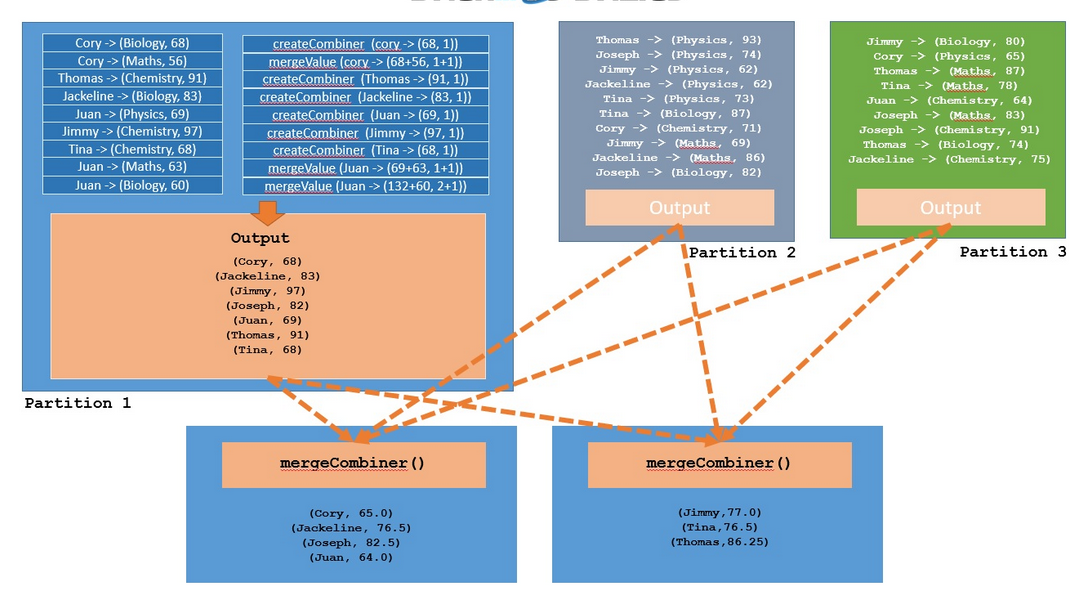

In [6]:
val studentRDD = sc.parallelize(Array(
    ("Joseph", "Maths", 83), ("Joseph", "Physics", 74), ("Joseph", "Chemistry", 91), 
    ("Joseph", "Biology", 82), ("Jimmy", "Maths", 69), ("Jimmy", "Physics", 62), 
    ("Jimmy", "Chemistry", 97), ("Jimmy", "Biology", 80), ("Tina", "Maths", 78), 
    ("Tina", "Physics", 73), ("Tina", "Chemistry", 68), ("Tina", "Biology", 87), 
    ("Thomas", "Maths", 87), ("Thomas", "Physics", 93), ("Thomas", "Chemistry", 91), 
    ("Thomas", "Biology", 74), ("Cory", "Maths", 56), ("Cory", "Physics", 65), 
    ("Cory", "Chemistry", 71), ("Cory", "Biology", 68), ("Jackeline", "Maths", 86), 
    ("Jackeline", "Physics", 62), ("Jackeline", "Chemistry", 75), ("Jackeline", "Biology", 83), 
    ("Juan", "Maths", 63), ("Juan", "Physics", 69), ("Juan", "Chemistry", 64), 
    ("Juan", "Biology", 60)), 3)

//Defining createCombiner, mergeValue and mergeCombiner functions
def createCombiner = (tuple: (String, Int)) => 
    (tuple._2.toDouble, 1)
    
def mergeValue = (accumulator: (Double, Int), element: (String, Int)) => 
    (accumulator._1 + element._2, accumulator._2 + 1)
    
def mergeCombiner = (accumulator1: (Double, Int), accumulator2: (Double, Int)) => 
    (accumulator1._1 + accumulator2._1, accumulator1._2 + accumulator2._2)


// use combineByKey for finding percentage
val combRDD = studentRDD.map(t => (t._1, (t._2, t._3)))
                        .combineByKey(createCombiner, mergeValue, mergeCombiner)
                        .map(e => (e._1, e._2._1/e._2._2))

//Check the Outout
combRDD.collect foreach println

(Tina,76.5)
(Thomas,86.25)
(Jackeline,76.5)
(Joseph,82.5)
(Juan,64.0)
(Jimmy,77.0)
(Cory,65.0)


studentRDD = ParallelCollectionRDD[81] at parallelize at <console>:29
createCombiner = > (Double, Int)
mergeValue = > (Double, Int)
mergeCombiner = > (Double, Int)
combRDD = MapPartitionsRDD[84] at map at <console>:55


MapPartitionsRDD[84] at map at <console>:55

# sortBy
Sorting is applied based on the key which we are passing.

Syntax def sortBy[K](f: ((String, Int)) => K,ascending: Boolean,numPartitions: Int)

In [9]:
val rdd1 = sc.parallelize(Seq(("India",91),("USA",1),("Brazil",55),("Greece",30),("China",86),
                              ("Sweden",46),("Turkey",90),("Nepal",977)))

rdd1.sortBy( x=> x._1).take(8)

rdd1.sortBy( x=> x._1,false).take(8) // Descending order

rdd1.sortBy( x=> x._1,false,3).take(8) // Descending order with 3 partition


rdd1 = ParallelCollectionRDD[94] at parallelize at <console>:32


Array((USA,1), (Turkey,90), (Sweden,46), (Nepal,977), (India,91), (Greece,30), (China,86), (Brazil,55))

# sortByKey()
This tranformation applied on the dataset of (K, V) pairs. The data is sorted according to the key K

def sortByKey(ascending: Boolean,numPartitions: Int) => Default sorting is ascending order

In [22]:
val data = spark.sparkContext.parallelize(Seq(("maths",52), ("english",75), ("science",82), ("computer",65), ("maths",85)))
val sorted = data.sortByKey()
sorted.collect()

data = ParallelCollectionRDD[34] at parallelize at <console>:29
sorted = ShuffledRDD[37] at sortByKey at <console>:30


Array((computer,65), (english,75), (maths,52), (maths,85), (science,82))

# sort
sort can be applied to the Dataframe.

In [10]:
import org.apache.spark.sql.functions._

val df = sc.parallelize(Seq(("India",91),("USA",1),("Brazil",55),("Greece",30),("China",86),
                            ("Sweden",46),("Turkey",90),("Nepal",977))).toDF("col1","col2")
df.sort(col("col1").desc).show()

df.sort($"col1".desc).show()

+------+----+
|  col1|col2|
+------+----+
|   USA|   1|
|Turkey|  90|
|Sweden|  46|
| Nepal| 977|
| India|  91|
|Greece|  30|
| China|  86|
|Brazil|  55|
+------+----+

+------+----+
|  col1|col2|
+------+----+
|   USA|   1|
|Turkey|  90|
|Sweden|  46|
| Nepal| 977|
| India|  91|
|Greece|  30|
| China|  86|
|Brazil|  55|
+------+----+



df = [col1: string, col2: int]


[col1: string, col2: int]

# orderBy
orderBy can be applied to the Dataframe. Functionality is same for both sort and orderBy.

In [8]:
import org.apache.spark.sql.functions._

val df = sc.parallelize(Seq(("India",91),("USA",1),("Brazil",55),("Greece",30),("China",86),
                            ("Sweden",46),("Turkey",90),("Nepal",977))).toDF("col1","col2")
df.orderBy(col("col1").desc).show()

df.orderBy($"col1".desc).show()

+------+----+
|  col1|col2|
+------+----+
|   USA|   1|
|Turkey|  90|
|Sweden|  46|
| Nepal| 977|
| India|  91|
|Greece|  30|
| China|  86|
|Brazil|  55|
+------+----+

+------+----+
|  col1|col2|
+------+----+
|   USA|   1|
|Turkey|  90|
|Sweden|  46|
| Nepal| 977|
| India|  91|
|Greece|  30|
| China|  86|
|Brazil|  55|
+------+----+



df = [col1: string, col2: int]


[col1: string, col2: int]

# join()
Join operation can be applied on the paired RDD. The join() operation combines two data sets on the basis of the key.

In [27]:
val data1 = sc.parallelize(Array(('A',1),('b',2),('c',3)))
val data2 = sc.parallelize(Array(('A',4),('A',6),('b',7),('c',3),('c',8)))
val result = data1.join(data2)
result.take(5)


data1 = ParallelCollectionRDD[50] at parallelize at <console>:31
data2 = ParallelCollectionRDD[51] at parallelize at <console>:32
result = MapPartitionsRDD[54] at join at <console>:33


Array((A,(1,4)), (A,(1,6)), (b,(2,7)), (c,(3,3)), (c,(3,8)))

# coalesce()
Avoids full shuffling of the data, can be used to decrease the no.of partitions.It uses existing partition so that less data is shuffled.

In [7]:
val rdd1 = spark.sparkContext.parallelize(Array("jan","feb","mar","april","may","jun"),3)
println(rdd1.getNumPartitions)
val result = rdd1.coalesce(2)
println(result.getNumPartitions)

3
2


rdd1 = ParallelCollectionRDD[57] at parallelize at <console>:30
result = CoalescedRDD[58] at coalesce at <console>:32


CoalescedRDD[58] at coalesce at <console>:32

# repartition()

# countByKey
 * It actually counts the number of elements for each key and return the result to the master as map of (key, count) pairs.     
 * This function can be applied on pairedRDD

In [15]:
val rdd1 = sc.parallelize(Seq(("Spark",78),("Hive",95),("spark",15),("HBase",25),("spark",39),("BigData",78),("spark",49)))
rdd1.countByKey

rdd1 = ParallelCollectionRDD[131] at parallelize at <console>:35


Map(Hive -> 1, BigData -> 1, HBase -> 1, spark -> 3, Spark -> 1)

# countByValue
 * It returns the Map of each unique value with its count. 
 * Do not apply this fucntion for huge dataset as it returns the result back to the master

In [11]:
val words = Array("one","two","two","four","five","six","six","eight","nine","ten")
val data = sc.parallelize(words)
data.countByValue()

words = Array(one, two, two, four, five, six, six, eight, nine, ten)
data = ParallelCollectionRDD[119] at parallelize at <console>:38


Map(four -> 1, two -> 2, six -> 2, ten -> 1, five -> 1, nine -> 1, one -> 1, eight -> 1)

# reduce
 * It aggregates the datasets using fuction
 * reduce takes two arguments and returns one value, this can be applied on associaive and cumulative operations.
 
 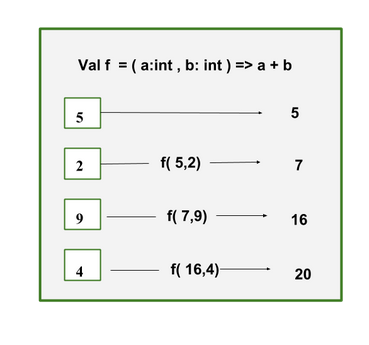

In [1]:
val rdd = sc.parallelize(1 to 10)
rdd.reduce(_ + _)

rdd = ParallelCollectionRDD[59] at parallelize at <console>:27


55

# fold

* It is similar to reduce but has one more argument 'ZERO VALUE' (say initial value) which will be used in the initial call on each partition.
* Due to this property, fold can also manage empty collections. If the collection is empty, the value initialized becomes the final answer.
* This behaves somewhat differently from fold operations implemented for non-distributed collections in functional languages like Scala

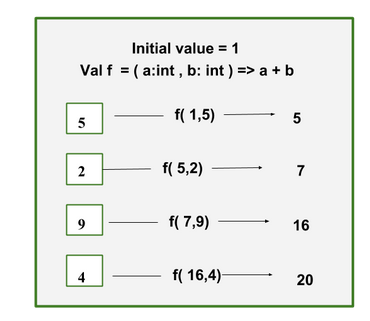

In [20]:
val seq_elements: Seq[Double] = Seq(3.5, 5.0, 1.5) 
val foldRdd = sc.parallelize(seq_elements)
foldRdd.fold(0.0)((a, b) => a + b)

seq_elements = List(3.5, 5.0, 1.5)
foldRdd = ParallelCollectionRDD[137] at parallelize at <console>:37


10.0

# foldByKey
 * foldByKey is also simlar to fold but it's operates on Pair RDD
 * foldByKey on the otherhand should be used in use cases where values need to be aggregated based on keys's

In [22]:
val a= spark.sparkContext.parallelize(Array(("a",1),("a",2),("b",2)))
val b =a.foldByKey(1)(_+_)
b.collect

/*Explanation

(a,1) (a,2) => foldByKey(1)(_+_) => (a,1+1)+(a,2+1) => 2+3 = 5
(b,2) => foldByKey(1)(_+_) => (b,2+1) = 3

*/

a = ParallelCollectionRDD[140] at parallelize at <console>:36
b = ShuffledRDD[141] at foldByKey at <console>:37


Array((a,5), (b,3))

# foldleft
foldByKey is also simlar to fold, the order for traversing the elements in the collection is from left to right and hence the name foldLeft

In [23]:
val prices: Seq[Double] = Seq(1.5, 2.0, 2.5)
prices.fold(0.0)((a,b) => a + b)

prices = List(1.5, 2.0, 2.5)


6.0

# broadcast
Broadcast variables are read-only variables that are distributed across worker nodes in-memory instead of shipping a copy of data with tasks.

In [42]:
val wordArr = Array("one","two","three","four","five")
val wordsRdd = sc.parallelize(wordArr)
val wordsMap = Map("one" -> 1,"two" -> 2,"three" -> 3,"four" -> 4,"five" -> 5)
val broadcastMap = sc.broadcast(wordsMap)
wordsRdd.map( word => {
    broadcastMap.value.get(word).get
}
).collect()

//broadcastMap.unpersist()

wordArr = Array(one, two, three, four, five)
wordsRdd = ParallelCollectionRDD[156] at parallelize at <console>:39
wordsMap = Map(four -> 4, three -> 3, two -> 2, five -> 5, one -> 1)
broadcastMap = Broadcast(101)


Array(1, 2, 3, 4, 5)

# accumulator
Accumulators are variables that are used for aggregating information across the executors

In [36]:
val wordArr = Array("one","two","two","four","five","six","six","eight","nine","ten")
val wordsRdd = sc.parallelize(wordArr)
var noOfWords = sc.accumulator(0,"noOfWords")
wordsRdd.foreach(x => noOfWords += 1)
println(noOfWords)


10


wordArr = Array(one, two, two, four, five, six, six, eight, nine, ten)
wordsRdd = ParallelCollectionRDD[147] at parallelize at <console>:38
noOfWords = 10


10